In [1]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

e:\repos\SURP-2024\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('GS1.xlsx')
df.sample(3)

,Year,Question
61,2020,Pala period is the most significant phase in t...
76,2020,Examine the status of forest resources of Indi...
43,2021,Differentiate the causes of landslides in the ...


In [4]:
questions = df['Question'].values.tolist()
questions[:3]

['Explain the role of geographical factors towards the development of Ancient India.',
 'What was the difference between Mahatma Gandhi and Rabindranath Tagore in their approach towards education and nationalism?',
 'Bring out the socio-economic effects of the introduction of railways in different countries of the world']

In [ ]:
#PIPELINE OF BERTMODEL
# 1. EMBEDDING - BY DEFAULT USES all-MiniLM-L6-v2 SENTENCE TRANSFORMER
# 2.  

In [5]:
#WE WILL USE THE BERTOPIC MODEL TO CLUSTER THE QUESTIONS
#FIRST USING DEFAULT MODEL

model = BERTopic()
topics, probs = model.fit_transform(questions)

In [6]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,80,-1_the_of_in_and,"[the, of, in, and, india, discuss, on, for, is...",[Why did the industrial revolution first occur...
1,0,32,0_the_of_and_how,"[the, of, and, how, do, on, in, are, monsoon, ...",[Why are the world’s fold mountain systems loc...
2,1,30,1_in_the_indian_society,"[in, the, indian, society, and, cultural, to, ...","[Are tolerance, assimilation and pluralism the..."
3,2,25,2_the_british_to_of,"[the, british, to, of, was, were, in, india, e...",[The 1857 uprising was the culmination of the ...
4,3,24,3_of_the_in_india,"[of, the, in, india, for, has, to, development...",[“The growth of cities as I.T. hubs has opened...
5,4,17,4_art_the_architecture_of,"[art, the, architecture, of, indian, discuss, ...",[Mesolithic rock cut architecture of India not...
6,5,15,5_water_and_in_of,"[water, and, in, of, india, the, resources, is...",[what are the environmental implications of th...
7,6,12,6_women_in_india_womens,"[women, in, india, womens, ratio, sex, that, t...",[‘Women’s movement in India has not addressed ...


In [7]:
model.generate_topic_labels(topic_prefix=False,separator=', ')

['the, of, in',
 'the, of, and',
 'in, the, indian',
 'the, british, to',
 'of, the, in',
 'art, the, architecture',
 'water, and, in',
 'women, in, india']

In [8]:
model.visualize_documents(questions)

In [10]:
#USING DIFFERENT WORD EMBEDDINGS
#USING SENTENCE TRANSFORMER
"""
    The all-mpnet-base-v2 model provides superior accuracy and a deeper understanding of the context and nuances in the text.
    Given the manageable size of your dataset (200-300 questions), 
    the additional computational resources required by this model are justified by the improved performance and precision.  
    Recommendation : huggingface transformer model sentence-transformers/stsb-roberta-large is best for this with best accuracy as far as i could find,
    but requires so much computation my little laptop cannot handle.
    even this model all-mpnet-base-v2 is heavy but i can manage it. like it takes 4-5 minutes to run the model.  
"""
sentence_model = SentenceTransformer('all-mpnet-base-v2')

In [11]:
model  = BERTopic(embedding_model=sentence_model)
topics, probs = model.fit_transform(questions)

In [12]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,18,-1_the_of_in_india,"[the, of, in, india, to, and, revolution, as, ...",[Why are the tribals in India referred to as '...
1,0,201,0_the_of_in_and,"[the, of, in, and, india, to, discuss, is, how...",[Examine the role of ‘Gig Economy’ in the proc...
2,1,16,1_the_art_of_architecture,"[the, art, of, architecture, and, indian, in, ...",[Assess the importance of the accounts of the ...


In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
embeddings = model._extract_embeddings(questions)
tsne = TSNE(n_components=2,random_state=42)
reduced = tsne.fit_transform(embeddings)

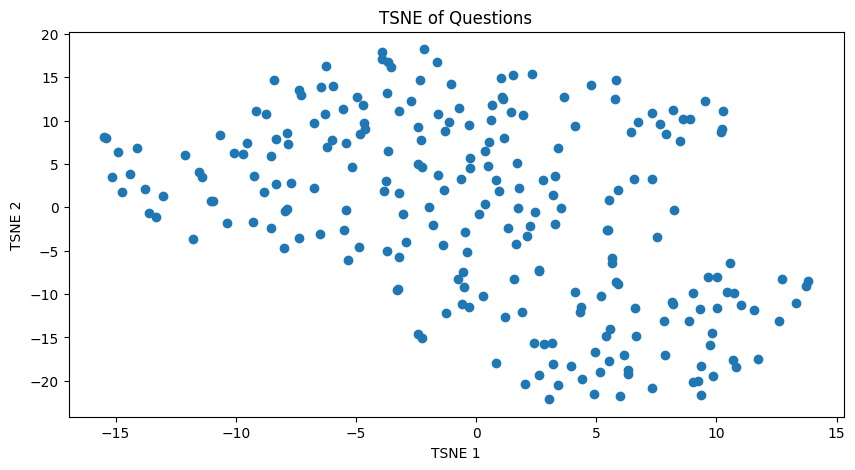

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(reduced[:,0], reduced[:,1])
plt.title("TSNE of Questions")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

In [15]:
model.visualize_documents(questions)

In [16]:
#USING FINETUNING 
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import PartOfSpeech

representation = [PartOfSpeech("en_core_web_sm"),MaximalMarginalRelevance(diversity=0.2),KeyBERTInspired(top_n_words=30)]

model = BERTopic(embedding_model=sentence_model,representation_model=representation,verbose=True,calculate_probabilities=True, nr_topics=20, n_gram_range=(1, 3), min_topic_size=5)



In [17]:
topics, probs = model.fit_transform(questions)

2024-07-12 14:03:21,738 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:13<00:00,  1.65s/it]
2024-07-12 14:03:35,070 - BERTopic - Embedding - Completed ✓
2024-07-12 14:03:35,073 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-12 14:03:48,942 - BERTopic - Dimensionality - Completed ✓
2024-07-12 14:03:48,944 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-12 14:03:49,003 - BERTopic - Cluster - Completed ✓
2024-07-12 14:03:49,004 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-12 14:04:07,499 - BERTopic - Representation - Completed ✓
2024-07-12 14:04:07,504 - BERTopic - Topic reduction - Reducing number of topics
2024-07-12 14:04:07,507 - BERTopic - Topic reduction - Reduced number of topics from 12 to 12


In [18]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,56,-1_the indian society_industrial revolution_in...,"[the indian society, industrial revolution, in...",[Why are the tribals in India referred to as '...
1,0,28,0_landslides in the_landslides_glaciers_of lan...,"[landslides in the, landslides, glaciers, of l...",[Bring out the causes for the formation of hea...
2,1,48,1_during the gandhian_struggle for freedom_gan...,"[during the gandhian, struggle for freedom, ga...",[Why did the ‘Moderates’ failed to carry convi...
3,2,11,2_ocean currents and_ocean currents describe_o...,"[ocean currents and, ocean currents describe, ...",[Explain the factors responsible for the origi...
4,3,16,3_problems of droughts_of irrigation and_water...,"[problems of droughts, of irrigation and, wate...",[In what way micro-watershed development proje...
5,4,17,4_indian art_of temple architecture_of the gup...,"[indian art, of temple architecture, of the gu...",[Assess the importance of the accounts of the ...
6,5,5,5_mining industry contributes_mining industry_...,"[mining industry contributes, mining industry,...",[Despite India being one of the countries of t...
7,6,6,6_of india discuss_net food exporter_india dis...,"[of india discuss, net food exporter, india di...",[Do you agree that there is a growing trend of...
8,7,17,7_pluralism in india_in indian society_indian ...,"[pluralism in india, in indian society, indian...","[Are tolerance, assimilation and pluralism the..."
9,8,8,8_of regionalism is_of regionalism_regions for...,"[of regionalism is, of regionalism, regions fo...",[Growing feeling of regionalism is an importan...


In [19]:
model.visualize_documents(questions)

In [32]:
#UPDATING C-TF-IDF
from bertopic.vectorizers import ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True,reduce_frequent_words=True)
model = BERTopic(embedding_model=sentence_model,representation_model=representation,ctfidf_model=ctfidf_model,verbose=True,calculate_probabilities=True, nr_topics=20, n_gram_range=(1, 3), min_topic_size=5)

In [33]:
topics, probs = model.fit_transform(questions)

2024-07-12 14:15:43,835 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 8/8 [00:11<00:00,  1.38s/it]
2024-07-12 14:15:54,894 - BERTopic - Embedding - Completed ✓
2024-07-12 14:15:54,895 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-12 14:16:01,181 - BERTopic - Dimensionality - Completed ✓
2024-07-12 14:16:01,182 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-12 14:16:01,219 - BERTopic - Cluster - Completed ✓
2024-07-12 14:16:01,221 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-12 14:16:12,427 - BERTopic - Representation - Completed ✓
2024-07-12 14:16:12,428 - BERTopic - Topic reduction - Reducing number of topics
2024-07-12 14:16:12,430 - BERTopic - Topic reduction - Reduced number of topics from 8 to 8


In [34]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,33,-1_scheduled tribes_women in india_indian_tribes,"[scheduled tribes, women in india, indian, tri...",[The political and administrative reorganizati...
1,0,64,0_glaciers_climate_climate change_western ghats,"[glaciers, climate, climate change, western gh...",[What do you understand by the phenomenon of ‘...
2,1,18,1_indian art_of vijayanagar was_of vijayanagar...,"[indian art, of vijayanagar was, of vijayanaga...",[The rock-cut architecture represents one of t...
3,2,43,2_of indian independence_gandhi in the_the gan...,"[of indian independence, gandhi in the, the ga...",[Why did the armies of the British East India ...
4,3,11,3_energy in india_oil producing areas_oil prod...,"[energy in india, oil producing areas, oil pro...",[Despite India being one of the countries of t...
5,4,15,4_poverty is the_poverty is to_poverty by the_...,"[poverty is the, poverty is to, poverty by the...",[‘Despite implementation of various programmes...
6,5,20,5_development in india_urbanization_economic d...,"[development in india, urbanization, economic ...",[Mention the advantages of the cultivation of ...
7,6,31,6_indian society_in indian society_diversity i...,"[indian society, in indian society, diversity ...",[Globalisation is generally said to promote cu...


In [35]:
model.visualize_documents(questions)

In [25]:
model.visualize_barchart()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3))
model.update_topics(questions,vectorizer_model=vectorizer_model)

In [37]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,33,-1_india_discuss_states_examine,"[india, discuss, states, examine, indian, glob...",[The political and administrative reorganizati...
1,0,64,0_water_india_discuss_world,"[water, india, discuss, world, explain, resour...",[What do you understand by the phenomenon of ‘...
2,1,18,1_art_architecture_indian_discuss,"[art, architecture, indian, discuss, early, hi...",[The rock-cut architecture represents one of t...
3,2,43,2_india_british_did_colonial,"[india, british, did, colonial, mahatma gandhi...",[Why did the armies of the British East India ...
4,3,11,3_energy_oil_countries_discuss,"[energy, oil, countries, discuss, india, steel...",[Despite India being one of the countries of t...
5,4,15,4_women_poverty_india_population,"[women, poverty, india, population, sex, ratio...",[‘Despite implementation of various programmes...
6,5,20,5_india_cities_new_development,"[india, cities, new, development, economic, sm...",[Mention the advantages of the cultivation of ...
7,6,31,6_cultural_indian_society_indian society,"[cultural, indian, society, indian society, in...",[Globalisation is generally said to promote cu...


In [41]:
model.visualize_documents(questions)

In [42]:
model.visualize_topics()

In [46]:
model.visualize_barchart()

In [71]:
topics_label = model.get_topic_info()['Name'].tolist()
for i in range(len(topics_label)):
    topics_label[i] = ' '.join(topics_label[i].split('_')[1:])
topics_label

['india discuss states examine',
 'water india discuss world',
 'art architecture indian discuss',
 'india british did colonial',
 'energy oil countries discuss',
 'women poverty india population',
 'india cities new development',
 'cultural indian society indian society']

In [93]:
question_index = 169
topic_probabilities = probs[question_index]
significant_probs = topic_probabilities[topic_probabilities > 0.05]
significant_topics = np.arange(len(topic_probabilities))[topic_probabilities > 0.05]
others = np.sum(topic_probabilities[topic_probabilities <= 0.05])

# Labels for the pie chart
labels = [topics_label[i+1] for i in significant_topics] + ["Others"]

# Probabilities to plot
probs_to_plot = np.append(significant_probs, others)

In [94]:
probs[question_index]

array([0.02297806, 0.03344143, 0.05867226, 0.03106042, 0.40484139,
       0.0589478 , 0.05560153])

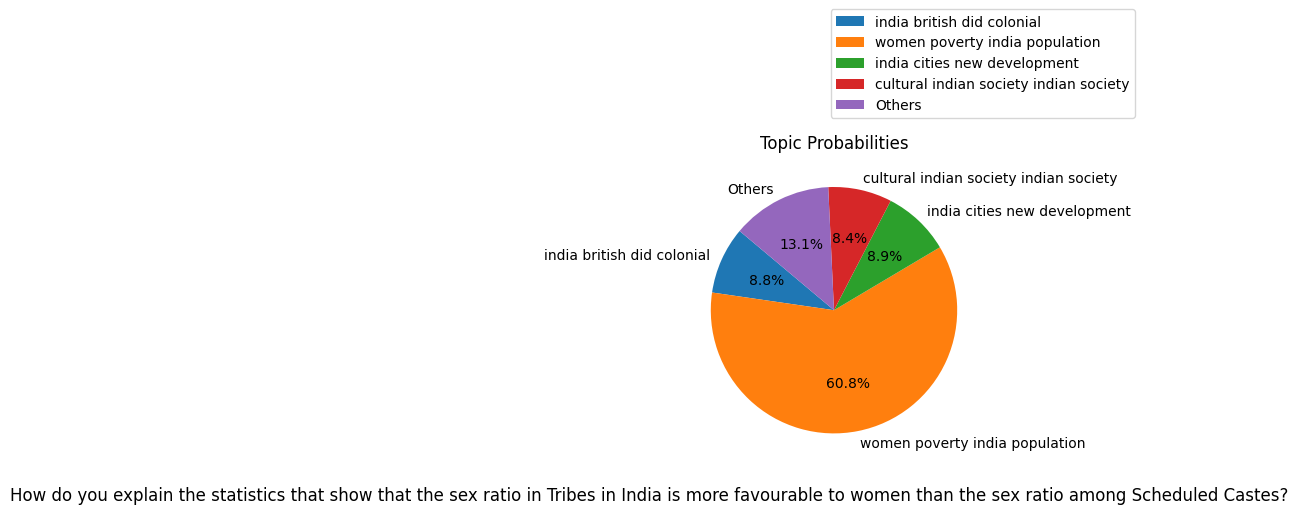

In [95]:
plt.figure(figsize=(4, 4))
plt.pie(probs_to_plot, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Topic Probabilities')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
plt.text(-1.5, -1.5, questions[question_index], fontsize=12, ha="center", va="center")
plt.show()

In [97]:
df['Topic_Number'] = topics
df.sample(5)

,Year,Question,Topic_Number
99,2019,Are we losing our local identity for the globa...,6
179,2015,What are the economic significances of discove...,0
224,2013,What do you understand by the theory of contin...,0
180,2014,To what extent has the urban planning and cult...,-1
209,2013,Several foreigners made India their homeland a...,2


In [98]:

df['Topic'] = df['Topic_Number'].apply(lambda x: " ".join(model.get_topic_info(topic=x)['Name'].iloc[0].split('_')[1:]))

# Display the first few rows of the DataFrame
df.head()

,Year,Question,Topic_Number,Topic
0,2023,Explain the role of geographical factors towar...,-1,india discuss states examine
1,2023,What was the difference between Mahatma Gandhi...,2,india british did colonial
2,2023,Bring out the socio-economic effects of the in...,5,india cities new development
3,2023,Discuss the consequences of climate change on ...,0,water india discuss world
4,2023,Why is the world today confronted with a crisi...,0,water india discuss world


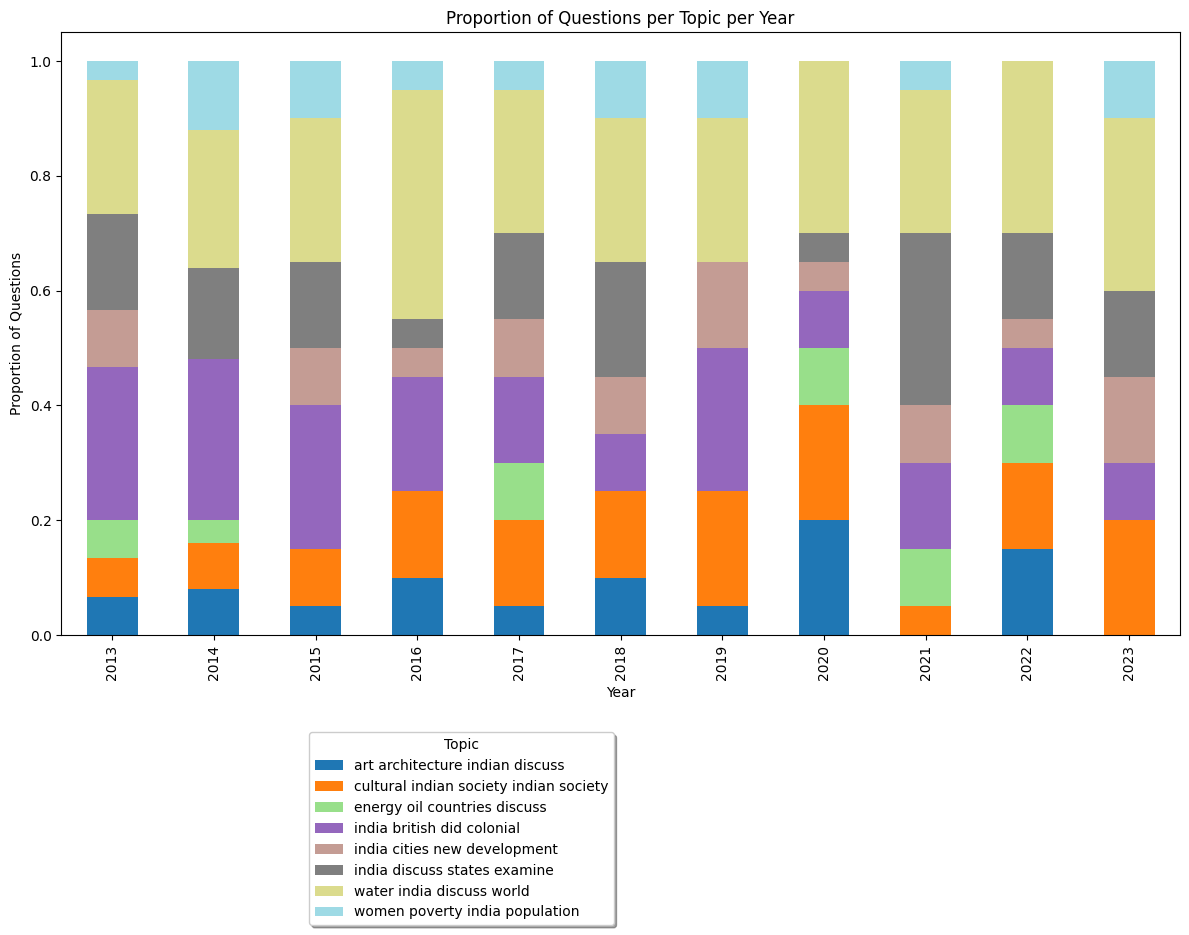

In [99]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming df is your DataFrame and it now includes a 'Topic' column after categorization

# Step 2: Count questions per topic per year
topic_year_counts = df.groupby(['Year', 'Topic']).size().reset_index(name='Count')

# Calculate the total number of questions per year
total_questions_per_year = topic_year_counts.groupby('Year')['Count'].transform('sum')

# Calculate the proportion of questions per topic per year
topic_year_counts['Proportion'] = topic_year_counts['Count'] / total_questions_per_year

# Step 3: Prepare data for plotting (normalized)
pivot_table = topic_year_counts.pivot(index='Year', columns='Topic', values='Proportion')

# Generate a list of colors from a colormap
num_topics = len(pivot_table.columns)
colors = plt.get_cmap('tab20', num_topics)

# Step 4: Plot the normalized data with different colors for each topic
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors(i) for i in range(num_topics)])

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Proportion of Questions')
plt.title('Proportion of Questions per Topic per Year')
plt.legend(title='Topic', loc='best', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()